<a href="https://colab.research.google.com/github/pavanarya/AI-ML/blob/main/ML/2.%20Perceptron/1.%20Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install numpy
!pip install matplotlib
!pip install pandas

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
import numpy as np
import matplotlib.pyplot as plt

positive_points = np.array([(-2,3),(0,1),(2,-1)])
negative_points = np.array([(-2,1),(0,-1),(2,-3)])

print(np.array([(2,3),(2,3)]).shape)

(2, 2)


In [30]:
X = np.vstack((positive_points,negative_points))
print(X)

y = np.array([1]*len(positive_points) + [-1]*len(negative_points))
print(y)

[[-2  3]
 [ 0  1]
 [ 2 -1]
 [-2  1]
 [ 0 -1]
 [ 2 -3]]
[ 1  1  1 -1 -1 -1]


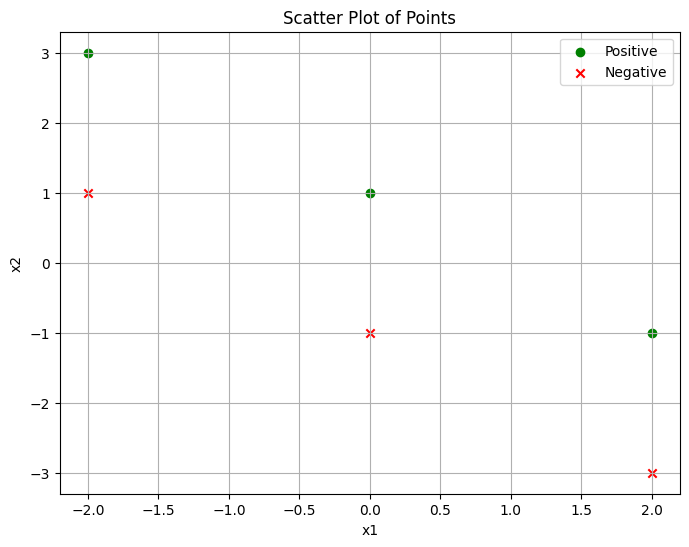

In [31]:
# prompt: plot above points

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(positive_points[:, 0], positive_points[:, 1],marker='o', color='green', label='Positive')
plt.scatter(negative_points[:, 0], negative_points[:, 1],marker='x', color='red', label='Negative')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter Plot of Points")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
X = np.vstack((positive_points, negative_points))
y = np.array([1]*len(positive_points) + [-1]*len(negative_points))

1. Decide number of iteration -- epoch
2. Initialize coefficients to zeros, ax+by+c=0, a and b are coefficients, c is constant
3. start with first iteration
4. Go through each data point in the data set and check current hypothesis prediction( y[i] * (np.dot(coefficients, x)) )

In [45]:
# Perceptron algorithm
def perceptron(X, y, epochs=10):
    coefficients = np.zeros(X.shape[1]) # ax1+bx2+c=0, a and b are coefficients, c is constant
    constant = 0
    for t in range(epochs):
        for i,xi in enumerate(X):
            calc=np.dot(xi,coefficients)+constant
            old_coefficients = np.copy(coefficients)
            old_cons = constant
            if y[i] * calc <= 0:
                coefficients += y[i] * xi
                constant += y[i]
                print("Iterationqq: "+str(t)+"  y[i]:"+str(y[i])+"  Data point:"+str(xi)+"  Coefficients:"+str(coefficients)+"  Constant:"+str(constant)+"   val:"+str(calc)+"  old_Coefficients:"+str(old_coefficients)+"  Old_Constant:"+str(old_cons))
                break
        #plot each iteration
        plot_decision_boundary(coefficients, constant, str(t+1)+"_"+str(i))
    return coefficients,constant

In [33]:
def plot_decision_boundary(coefficients, constant, iteration):
  plt.figure(figsize=(8,6))
  plt.scatter(positive_points[:, 0], positive_points[:, 1],marker='o', color='green', label='Positive')
  plt.scatter(negative_points[:, 0], negative_points[:, 1],marker='x', color='red', label='Negative')

  x_values = np.linspace(-3, 3, 2)
  if coefficients[1] != 0:
    y_values = -(coefficients[0] * x_values + constant) / coefficients[1]
    plt.plot(x_values, y_values, label=f'Iteration {iteration}')
  else:
    x_value = -constant/coefficients[0]
    plt.axvline(x=x_value, color='blue', linestyle='--', label=f'Iteration {iteration}')

  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.xlim(-3, 3)
  plt.ylim(-4, 4)
  plt.title("Scatter Plot of Points")
  plt.legend()
  plt.grid(True)
  plt.show()

Iterationqq: 0  y[i]:1  Data point:[-2  3]  Coefficients:[-2.  3.]  Constant:1   val:0.0  old_Coefficients:[0. 0.]  Old_Constant:0


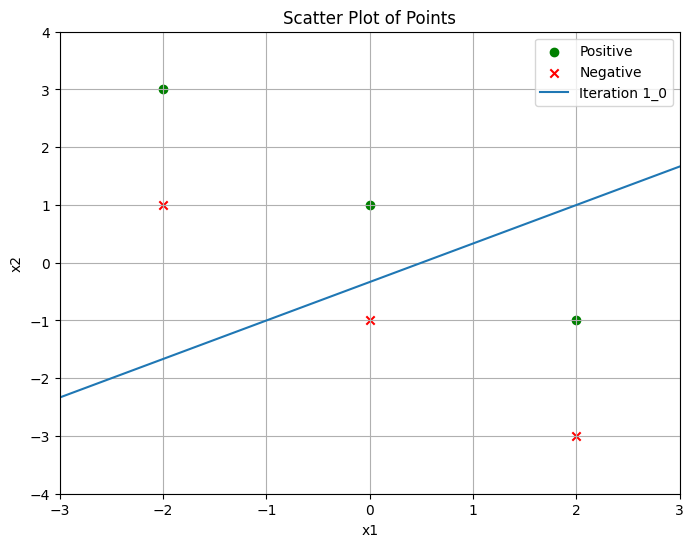

Iterationqq: 1  y[i]:1  Data point:[ 2 -1]  Coefficients:[0. 2.]  Constant:2   val:-6.0  old_Coefficients:[-2.  3.]  Old_Constant:1


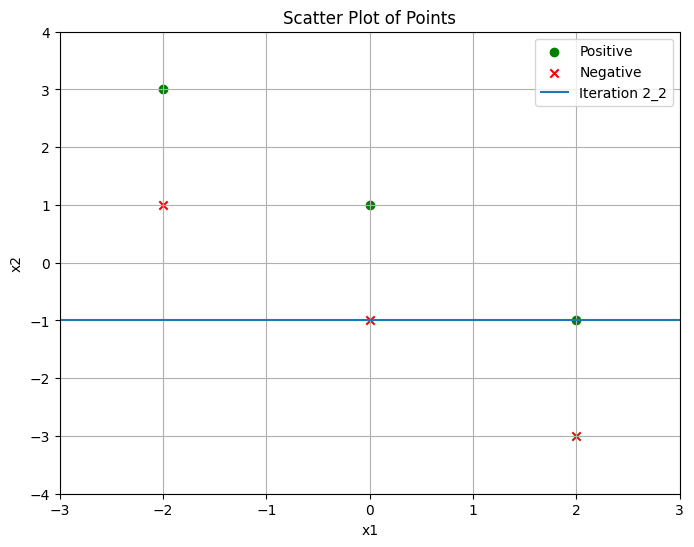

Iterationqq: 2  y[i]:1  Data point:[ 2 -1]  Coefficients:[2. 1.]  Constant:3   val:0.0  old_Coefficients:[0. 2.]  Old_Constant:2


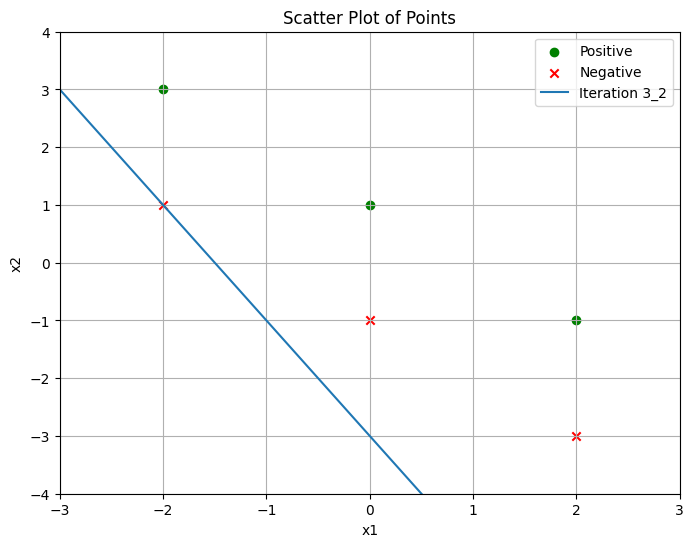

Iterationqq: 3  y[i]:-1  Data point:[-2  1]  Coefficients:[4. 0.]  Constant:2   val:0.0  old_Coefficients:[2. 1.]  Old_Constant:3


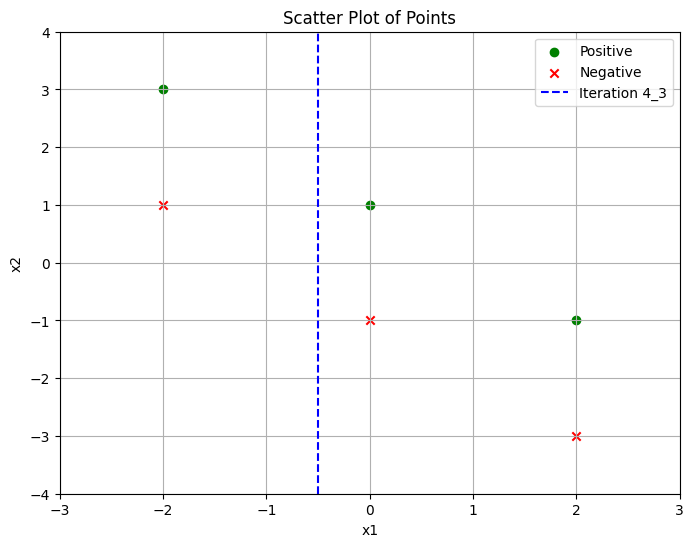

Iterationqq: 4  y[i]:1  Data point:[-2  3]  Coefficients:[2. 3.]  Constant:3   val:-6.0  old_Coefficients:[4. 0.]  Old_Constant:2


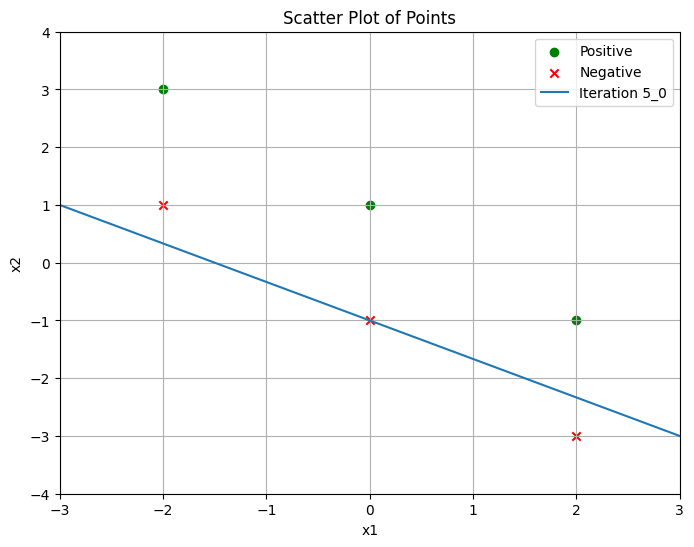

Iterationqq: 5  y[i]:-1  Data point:[-2  1]  Coefficients:[4. 2.]  Constant:2   val:2.0  old_Coefficients:[2. 3.]  Old_Constant:3


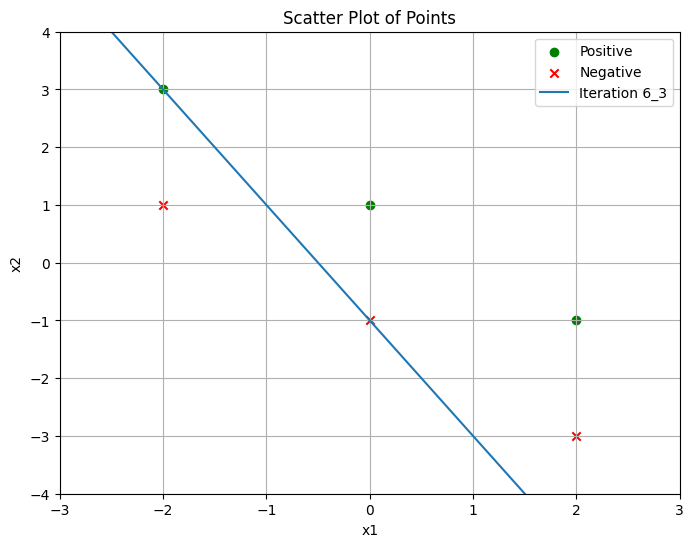

Iterationqq: 6  y[i]:1  Data point:[-2  3]  Coefficients:[2. 5.]  Constant:3   val:0.0  old_Coefficients:[4. 2.]  Old_Constant:2


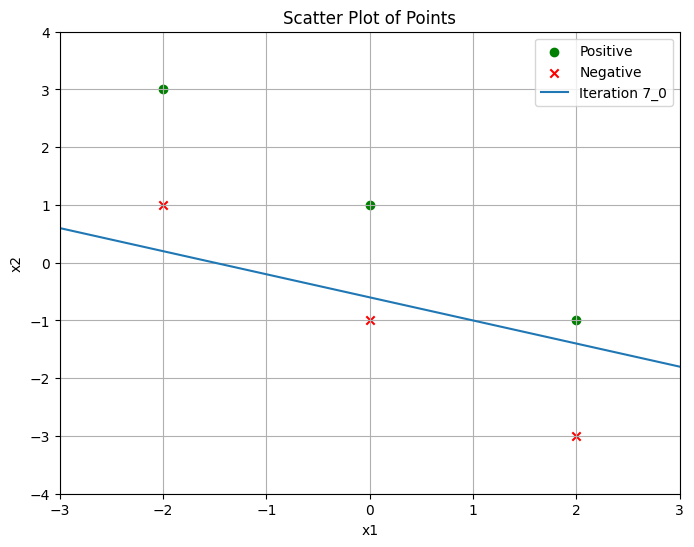

Iterationqq: 7  y[i]:-1  Data point:[-2  1]  Coefficients:[4. 4.]  Constant:2   val:4.0  old_Coefficients:[2. 5.]  Old_Constant:3


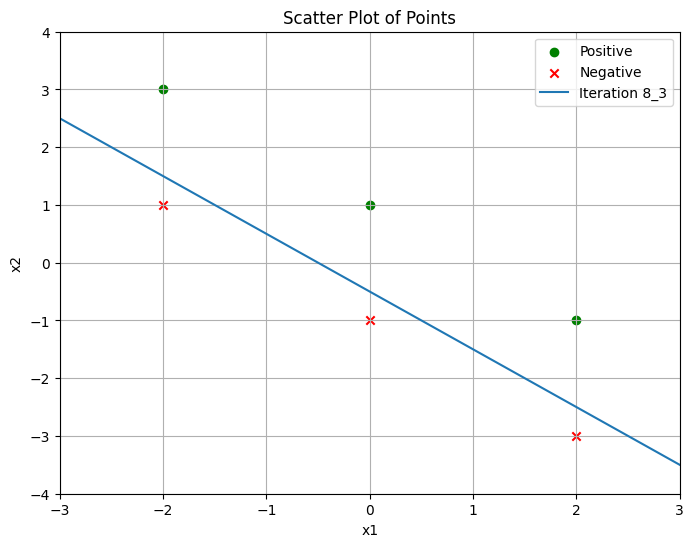

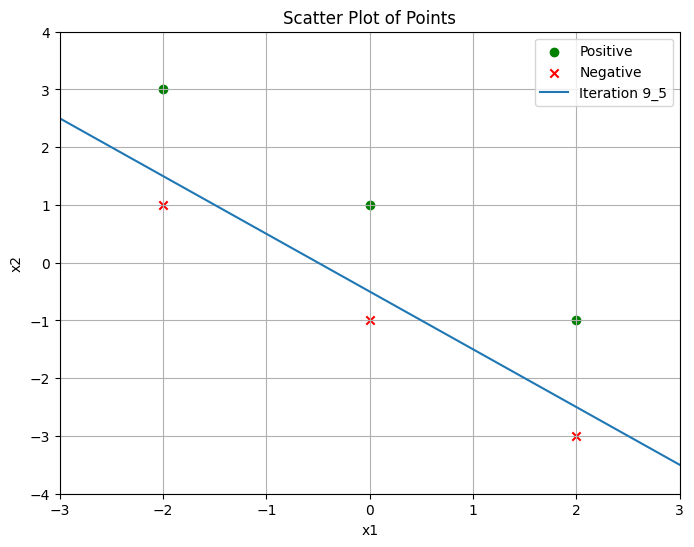

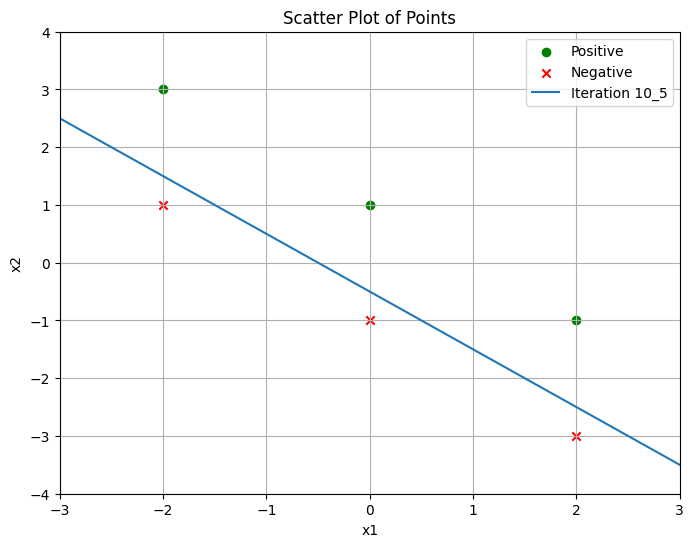

In [46]:
coefficients_final, constant_final = perceptron(X, y, epochs=10)

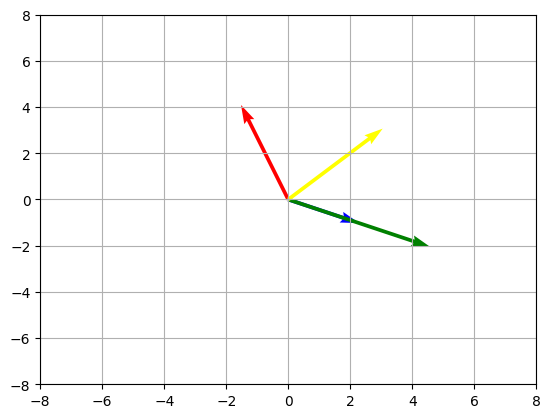

In [42]:
V = np.array([[-2,4], [3,-1], [6,-2], [4,3]])
origin = np.array([[0, 0, 0,0],[0, 0, 0,0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g','yellow'], scale=21)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.grid()
plt.show()